<a href="https://colab.research.google.com/github/NnamdiOdozi/Python_UDFs/blob/main/SWYieldCurvesInterpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install yfinance
!pip install yahoofinancials
#!pip install pandas_datareader
!pip install kaggle
#!pip install summarytools
!pip install pyxirr
!pip install pandas
!pip install zipline-reloaded


import pyxirr
import timeit
#from summarytools import dfSummary
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib as mpb
import jinja2
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # Can also use plotly
import matplotlib.animation as animation

import yfinance as yf
from yahoofinancials import YahooFinancials
from scipy.interpolate import interp1d, CubicSpline
import scipy.stats as stats
import statsmodels.api as sm
#matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 893.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.16-py3-none-any.whl size=28709 sha256=498f86cdef450fe6f3889842634a15d262462ef873385322e7e2a1691557e154
  Stored in directory: /root/.cache/pip/wheels/fd/fe/c4/4b17989f30abf08d147a72cd1097ae0f6b1a1dd070f3abf726
Successfully built yahoofinancials
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.2/429.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

# New Section

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SWForwardRatesRaw.xlsx', sheet_name='ForwardCurves', index_col=0, parse_dates=False)
#df_yieldcurves.index = pd.to_datetime(df_yieldcurves.index)

In [ ]:
df

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,119.250000,119.333333,119.416667,119.500000,119.583333,119.666667,119.750000,119.833333,119.916667,120.000000
Tenor,,,,,,,,,,,,,,,,,,,,,
30/06/2022,0.0629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1315
31/07/2022,0.0696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1349
31/08/2022,0.0691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1365
30/09/2022,0.0916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1434
31/10/2022,0.1515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1495
30/11/2022,0.1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1472
31/12/2022,0.0846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1400
31/01/2023,0.0391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1496
28/02/2023,0.0383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1520


In [ ]:
"""
#new_cols = np.arange(0.0, 120.0, 1/12)
#df_yieldcurves.columns = new_cols


num_months = (int(df.columns[-1]) - int(df.columns[0])) * 12

# Generate the monthly fractions
monthly_columns = [f'{int(df.columns[0])}.{i:02}' for i in range(1, num_months + 1)]

# Create a new DataFrame with expanded columns
expanded_df = pd.DataFrame(columns=monthly_columns)

# Copy data from the original DataFrame to the expanded DataFrame
for col in df.columns:
    year = int(col)
    month_offset = (year - int(df.columns[0])) * 12
    monthly_cols = [f'{year}.{i:02}' for i in range(1, 13)]
    expanded_df[monthly_cols] = df[col].values[:, None].repeat(12, axis=1)
    expanded_df.columns = monthly_columns[month_offset:month_offset+12]



#df1 = df_yieldcurves.interpolate(method = 'linear', axis=1)
"""

"\n#new_cols = np.arange(0.0, 120.0, 1/12)\n#df_yieldcurves.columns = new_cols\n\n\nnum_months = (int(df.columns[-1]) - int(df.columns[0])) * 12\n\n# Generate the monthly fractions\nmonthly_columns = [f'{int(df.columns[0])}.{i:02}' for i in range(1, num_months + 1)]\n\n# Create a new DataFrame with expanded columns\nexpanded_df = pd.DataFrame(columns=monthly_columns)\n\n# Copy data from the original DataFrame to the expanded DataFrame\nfor col in df.columns:\n    year = int(col)\n    month_offset = (year - int(df.columns[0])) * 12\n    monthly_cols = [f'{year}.{i:02}' for i in range(1, 13)]\n    expanded_df[monthly_cols] = df[col].values[:, None].repeat(12, axis=1)\n    expanded_df.columns = monthly_columns[month_offset:month_offset+12]\n\n\n\n#df1 = df_yieldcurves.interpolate(method = 'linear', axis=1)\n"

In [ ]:
df1 = df.interpolate(method = 'linear', axis=1)

In [ ]:
df1


,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,119.250000,119.333333,119.416667,119.500000,119.583333,119.666667,119.750000,119.833333,119.916667,120.000000
Tenor,,,,,,,,,,,,,,,,,,,,,
30/06/2022,0.0629,0.0629,0.0629,0.0629,0.0629,0.0629,0.0629,0.0629,0.0629,0.0629,...,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315
31/07/2022,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,0.0696,...,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349
31/08/2022,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,...,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365
30/09/2022,0.0916,0.0916,0.0916,0.0916,0.0916,0.0916,0.0916,0.0916,0.0916,0.0916,...,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434
31/10/2022,0.1515,0.1515,0.1515,0.1515,0.1515,0.1515,0.1515,0.1515,0.1515,0.1515,...,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495
30/11/2022,0.1596,0.1596,0.1596,0.1596,0.1596,0.1596,0.1596,0.1596,0.1596,0.1596,...,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472
31/12/2022,0.0846,0.0846,0.0846,0.0846,0.0846,0.0846,0.0846,0.0846,0.0846,0.0846,...,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400
31/01/2023,0.0391,0.0391,0.0391,0.0391,0.0391,0.0391,0.0391,0.0391,0.0391,0.0391,...,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496
28/02/2023,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,0.0383,...,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520


In [ ]:
df2 = df.interpolate(method ='cubic', axis = 1)
df2

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,119.250000,119.333333,119.416667,119.500000,119.583333,119.666667,119.750000,119.833333,119.916667,120.000000
Tenor,,,,,,,,,,,,,,,,,,,,,
30/06/2022,0.0629,0.058653,0.055352,0.052945,0.051378,0.050601,0.050562,0.051208,0.052487,0.054348,...,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315,0.1315
31/07/2022,0.0696,0.057550,0.048356,0.041817,0.037736,0.035911,0.036145,0.038237,0.041989,0.047200,...,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349
31/08/2022,0.0691,0.053599,0.041761,0.033333,0.028061,0.025692,0.025972,0.028648,0.033467,0.040175,...,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365,0.1365
30/09/2022,0.0916,0.081022,0.072924,0.067138,0.063497,0.061835,0.061986,0.063781,0.067055,0.071641,...,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434,0.1434
31/10/2022,0.1515,0.152739,0.153667,0.154311,0.154695,0.154846,0.154789,0.154549,0.154152,0.153623,...,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495,0.1495
30/11/2022,0.1596,0.163531,0.166522,0.168639,0.169952,0.170527,0.170432,0.169736,0.168506,0.166809,...,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472,0.1472
31/12/2022,0.0846,0.071491,0.061560,0.054568,0.050278,0.048450,0.048848,0.051231,0.055362,0.061003,...,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400,0.1400
31/01/2023,0.0391,0.022308,0.009446,0.000252,-0.005538,-0.008187,-0.007958,-0.005115,0.000079,0.007360,...,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496,0.1496
28/02/2023,0.0383,0.022117,0.009725,0.000871,-0.004702,-0.007247,-0.007019,-0.004274,0.000734,0.007750,...,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520


In [ ]:
df_Arr = df.dropna(axis=1).to_numpy()
df_Arr


array([[0.0629, 0.0629, 0.1167, ..., 0.1315, 0.1315, 0.1315],
       [0.0696, 0.0696, 0.165 , ..., 0.1349, 0.1349, 0.1349],
       [0.0691, 0.0691, 0.1952, ..., 0.1365, 0.1365, 0.1365],
       ...,
       [0.0793, 0.0793, 0.127 , ..., 0.1469, 0.1469, 0.1469],
       [0.1023, 0.1023, 0.1041, ..., 0.1482, 0.1482, 0.1482],
       [0.1188, 0.1188, 0.1342, ..., 0.1591, 0.1591, 0.1591]])

In [ ]:
x = np.asarray(df.dropna(axis = 1).columns)
x


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.])

In [ ]:
df3 = df.interpolate(method ='spline', order = 3, axis = 1)
df3

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,119.250000,119.333333,119.416667,119.500000,119.583333,119.666667,119.750000,119.833333,119.916667,120.000000
Tenor,,,,,,,,,,,,,,,,,,,,,
30/06/2022,0.0629,0.125027,0.125572,0.126115,0.126656,0.127195,0.127732,0.128266,0.128799,0.129330,...,0.175298,0.175793,0.176290,0.176789,0.177291,0.177794,0.178299,0.178807,0.179316,0.1315
31/07/2022,0.0696,0.131088,0.132168,0.133245,0.134318,0.135386,0.136450,0.137510,0.138566,0.139618,...,0.224087,0.225094,0.226105,0.227120,0.228140,0.229163,0.230190,0.231222,0.232257,0.1349
31/08/2022,0.0691,0.142941,0.142919,0.142896,0.142873,0.142850,0.142827,0.142805,0.142782,0.142760,...,0.137286,0.137289,0.137292,0.137296,0.137299,0.137302,0.137305,0.137308,0.137312,0.1365
30/09/2022,0.0916,0.157486,0.157542,0.157598,0.157653,0.157708,0.157763,0.157817,0.157872,0.157926,...,0.152157,0.152251,0.152345,0.152439,0.152534,0.152630,0.152725,0.152821,0.152918,0.1434
31/10/2022,0.1515,0.170503,0.170465,0.170427,0.170389,0.170351,0.170313,0.170275,0.170237,0.170199,...,0.152109,0.152133,0.152156,0.152180,0.152204,0.152228,0.152251,0.152275,0.152299,0.1495
30/11/2022,0.1596,0.164976,0.164927,0.164879,0.164831,0.164784,0.164736,0.164688,0.164640,0.164593,...,0.147362,0.147361,0.147361,0.147361,0.147360,0.147360,0.147360,0.147359,0.147359,0.1472
31/12/2022,0.0846,0.153806,0.153804,0.153801,0.153799,0.153797,0.153794,0.153792,0.153789,0.153786,...,0.144920,0.144967,0.145013,0.145060,0.145107,0.145154,0.145201,0.145248,0.145296,0.1400
31/01/2023,0.0391,0.167069,0.167024,0.166980,0.166935,0.166890,0.166846,0.166801,0.166757,0.166712,...,0.152820,0.152843,0.152865,0.152888,0.152911,0.152934,0.152957,0.152980,0.153003,0.1496
28/02/2023,0.0383,0.170533,0.170727,0.170920,0.171111,0.171303,0.171493,0.171682,0.171871,0.172058,...,0.175075,0.175322,0.175571,0.175821,0.176071,0.176323,0.176576,0.176829,0.177084,0.1520


In [ ]:
f3a = CubicSpline(x,df_Arr, axis = 1)
f3b = CubicSpline(x,df_Arr, axis = 1, bc_type='natural')

In [ ]:
x_new  = np.linspace(0, 120, 1441)
y_new3a, y_new3b = f3a(x_new), f3b(x_new)
df3a, df3b = pd.DataFrame(data = y_new3a, index = df.index, columns = x_new), pd.DataFrame(data = y_new3b, index = df.index, columns = x_new)

In [ ]:
df_Arr = df.dropna(axis=1).to_numpy()
x = np.asarray(df.dropna(axis = 1).columns)
f3a = CubicSpline(x,df_Arr, axis = 1)
x_new  = np.linspace(0, 120, 1441)
y_new3a= f3a(x_new)
df3a = pd.DataFrame(data = y_new3a, index = df.index, columns = x_new)

In [ ]:
df4 = df.interpolate(method ='quadratic', axis = 1)


In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/SWForwardRatesRaw.xlsx',
                    mode='a', if_sheet_exists="overlay") as writer:
  df1.to_excel(writer, sheet_name='LinearInterpolation')
  df2.to_excel(writer, sheet_name='CubicPolynomialInterpolation')
  df3.to_excel(writer, sheet_name='CubicSplineInterpolation')
  df3a.to_excel(writer, sheet_name='CubicSplineInterpolation - CS')
  df3b.to_excel(writer, sheet_name='CubicSplineInterpolation - CS with BC')
  df4.to_excel(writer, sheet_name='QuadraticInterpolation')

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
from scipy.interpolate import CubicSpline

# Example DataFrame with missing values
df = pd.DataFrame({'X': [1, 2, None, 4, 5], 'Y': [3, None, 6, 8, 9]})

# Perform cubic spline interpolation
#df_interpolated = df.interpolate(method='cubic')



In [ ]:
#df_interpolated

,X,Y
0,1.0,3.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,9.0


In [ ]:
# Extract the interpolated values
x_values = df.dropna()['X'].values
y_values = df.dropna()['Y'].values



In [ ]:
# Create a cubic spline object
spline = CubicSpline(x_values, y_values)

# Get the polynomial coefficients
coefficients = spline.c

# Print the polynomial equation
polynomial_equation = f'{coefficients[3]}x^3 + {coefficients[2]}x^2 + {coefficients[1]}x + {coefficients[0]}'
print(polynomial_equation)

[3. 8.]x^3 + [2.16666667 1.16666667]x^2 + [-0.16666667 -0.16666667]x + [0. 0.]


In [ ]:
spline.axis

0

In [ ]:
y_1 = spline.__call__(2, nu=0)

In [ ]:
df_yieldcurves.describe([.005,.05,.25, .5, .75, .95, .995])

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,111yr,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,...,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,0.131359,0.129043,0.129767,0.131703,0.134897,0.136423,0.139038,0.139162,0.140368,0.142457,...,0.126372,0.125470,0.124565,0.123665,0.122765,0.121868,0.120967,0.120063,0.119164,0.118272
std,0.063011,0.044235,0.038108,0.034128,0.032384,0.029609,0.028083,0.026876,0.026294,0.026174,...,0.014310,0.013933,0.013566,0.013212,0.012870,0.012538,0.012215,0.011900,0.011593,0.011297
min,0.002602,0.012905,0.013776,0.024905,0.030147,0.034383,0.035866,0.039101,0.041506,0.043038,...,0.063184,0.063122,0.063060,0.063000,0.062941,0.062882,0.062825,0.062769,0.062713,0.062659
0.5%,0.003303,0.015229,0.016978,0.026467,0.032359,0.035352,0.038357,0.040659,0.042522,0.044538,...,0.067078,0.067050,0.067023,0.066996,0.066967,0.066939,0.066911,0.066884,0.066857,0.066831
5%,0.022033,0.033404,0.041824,0.052946,0.061807,0.071266,0.079032,0.084423,0.086214,0.090005,...,0.092866,0.092846,0.092827,0.092808,0.092790,0.092772,0.092754,0.092736,0.092719,0.092702
25%,0.081873,0.103215,0.110344,0.118075,0.125833,0.126769,0.128147,0.128405,0.129090,0.131324,...,0.128573,0.128559,0.128545,0.128532,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
50%,0.145423,0.143933,0.144428,0.144019,0.145823,0.145691,0.146764,0.146086,0.146826,0.148738,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
75%,0.168692,0.157951,0.155016,0.154762,0.157184,0.156922,0.158168,0.157289,0.158510,0.160565,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
95%,0.222720,0.179455,0.167951,0.165351,0.166242,0.165586,0.167272,0.167093,0.168271,0.170975,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018


In [ ]:
df_yieldcurves.describe()
df_yieldcurves.info()
df_yieldcurves.min()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582 entries, 2015-01-05 to 2021-06-02
Columns: 120 entries, 1yr to 120yr
dtypes: float64(120)
memory usage: 1.5 MB


1yr      0.002602
2yr      0.012905
3yr      0.013776
4yr      0.024905
5yr      0.030147
           ...   
116yr    0.062882
117yr    0.062825
118yr    0.062769
119yr    0.062713
120yr    0.062659
Length: 120, dtype: float64

In [ ]:

df2= df_yieldcurves[['2yr', '10yr']]
Mask = df_yieldcurves['2yr'] > df_yieldcurves['10yr']
df2.loc[Mask, 'Inverted'] = 'True'
df2

<ipython-input-6-4ff87c1c250c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[Mask, 'Inverted'] = 'True'


,2yr,10yr,Inverted
2015-01-05,0.154628,0.155242,NaN
2015-01-06,0.155531,0.154777,True
2015-01-07,0.158613,0.153927,True
2015-01-08,0.159271,0.157721,True
2015-01-09,0.158805,0.158668,True
...,...,...,...
2021-05-27,0.123977,0.142988,NaN
2021-05-28,0.123519,0.143484,NaN
2021-05-31,0.123397,0.144127,NaN
2021-06-01,0.123390,0.144373,NaN


In [ ]:
%timeit -n1 df2.apply(lambda x: x['2yr'] + x['10yr'], axis=1)


37.1 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df_yieldcurves_max = df_yieldcurves.idxmax(axis=1)
df_yieldcurves_max


2015-01-05     1yr
2015-01-06     1yr
2015-01-07     1yr
2015-01-08    20yr
2015-01-09    20yr
              ... 
2021-05-27    15yr
2021-05-28    15yr
2021-05-31    15yr
2021-06-01    15yr
2021-06-02    15yr
Length: 1582, dtype: object

In [ ]:


print(df_yieldcurves[['1yr', '5yr','10yr', '20yr','30yr', '40yr']].asfreq('D').ffill().asfreq('M').head(30))
df_yieldcurves.resample('M').apply(lambda i: i.iloc[-1])
#df_yieldcurves.resample('M').mean()

                 1yr       5yr      10yr      20yr      30yr      40yr
2015-01-31  0.162191  0.158367  0.156360  0.160929  0.157469  0.155698
2015-02-28  0.167291  0.165983  0.165851  0.171746  0.167524  0.165362
2015-03-31  0.162296  0.155377  0.159311  0.162502  0.158615  0.156631
2015-04-30  0.149806  0.145607  0.150712  0.152529  0.149190  0.147489
2015-05-31  0.145517  0.144368  0.148724  0.150268  0.147048  0.145407
2015-06-30  0.146283  0.155832  0.155211  0.158628  0.155131  0.153344
2015-07-31  0.152824  0.152901  0.158810  0.161613  0.157721  0.155735
2015-08-31  0.159296  0.165507  0.165814  0.170957  0.166661  0.164465
2015-09-30  0.144038  0.157062  0.160503  0.163654  0.159650  0.157607
2015-10-31  0.112876  0.136549  0.152869  0.151219  0.147208  0.145175
2015-11-30  0.051365  0.115950  0.119818  0.118388  0.116407  0.115404
2015-12-31  0.085893  0.115549  0.116228  0.115267  0.113560  0.112694
2016-01-31  0.095302  0.126614  0.124866  0.124492  0.122481  0.121459
2016-0

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,111yr,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr
2015-01-31,0.162191,0.157297,0.158295,0.156942,0.158367,0.157531,0.158457,0.156386,0.155803,0.156360,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
2015-02-28,0.167291,0.171749,0.169825,0.165982,0.165983,0.165073,0.166163,0.164585,0.164604,0.165851,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
2015-03-31,0.162296,0.155201,0.155497,0.154064,0.155377,0.154378,0.155201,0.155346,0.156825,0.159311,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
2015-04-30,0.149806,0.145655,0.145379,0.144304,0.145607,0.145202,0.146331,0.146735,0.148293,0.150712,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
2015-05-31,0.145517,0.143444,0.144105,0.143099,0.144368,0.143015,0.143328,0.144124,0.146023,0.148724,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,0.023849,0.064706,0.071011,0.080775,0.088315,0.103130,0.116728,0.118284,0.120259,0.122862,...,0.116905,0.116879,0.116854,0.116829,0.116804,0.116780,0.116756,0.116733,0.116710,0.116687
2021-03-31,0.066060,0.064576,0.078357,0.096093,0.109564,0.111288,0.113391,0.114197,0.115684,0.117814,...,0.118893,0.118858,0.118823,0.118788,0.118754,0.118721,0.118688,0.118656,0.118624,0.118593
2021-04-30,0.082055,0.109582,0.114935,0.124125,0.132204,0.131293,0.131742,0.132844,0.134990,0.138106,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018
2021-05-31,0.097519,0.123397,0.126147,0.129629,0.133842,0.135210,0.137681,0.138763,0.140923,0.144127,...,0.132541,0.131283,0.130049,0.128838,0.127649,0.126482,0.125336,0.124210,0.123105,0.122018


In [ ]:
# How do I make this bar plot work

#sns.countplot(df_yieldcurves_max)
#df_yieldcurves_max.plot.bar()
#dfSummary(df_yieldcurves)

In [ ]:
df_yieldcurves_d1 = df_yieldcurves.diff(1)
df_yieldcurves_d10 = df_yieldcurves.diff(10)
df_yieldcurves_d30 = df_yieldcurves.diff(30)
df_yieldcurves_d30.mean()
df_yieldcurves_d30.describe()


#print(df_yieldcurves_d1.quantile(0.995), df_yieldcurves_d10.quantile(0.995), df_yieldcurves_d30.quantile(0.995))

logMonthChanges = np.log(df_yieldcurves.pct_change(-30) + 1)
#logMonthChanges = np.log(df_yieldcurves.shift(30, fill_value=np.NaN)/df_yieldcurves)
logMonthChanges[['10yr', '20yr','30yr', '40yr']].head()

mask = (df_yieldcurves_d1['10yr'] > 0.03) | (df_yieldcurves_d1['10yr'] < -0.03)
df_yieldcurves_d1[['10yr', '20yr','30yr', '40yr']][mask]


,10yr,20yr,30yr,40yr
2018-08-07,-0.031726,-0.034009,-0.032460,-0.031667
2018-08-08,0.032496,0.034579,0.032939,0.032102
2020-03-16,0.032732,-0.017440,-0.009127,-0.004950
2020-07-02,-0.034813,0.015686,0.010446,0.007823


In [ ]:
df_yieldcurves_d1.nlargest(10, '10yr')

,1yr,2yr,3yr,4yr,5yr,6yr,7yr,8yr,9yr,10yr,...,111yr,112yr,113yr,114yr,115yr,116yr,117yr,118yr,119yr,120yr
2020-03-16,2.004055e-04,-0.010538,0.014485,0.005519,-0.000932,-0.001399,-0.001030,0.013669,0.024749,0.032732,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-08-08,2.172147e-02,0.031970,0.031655,0.030407,0.030427,0.032108,0.034101,0.033022,0.032510,0.032496,...,0.020186,0.018936,0.017710,0.016507,0.015326,0.014167,0.013029,0.011911,0.010813,0.009734
2021-02-08,5.058125e-04,0.006447,0.000385,0.006316,0.010509,0.003654,-0.001803,0.005344,0.012486,0.019505,...,0.000855,0.000868,0.000881,0.000893,0.000906,0.000918,0.000930,0.000941,0.000953,0.000964
2020-08-07,4.546908e-07,-0.000103,-0.000105,-0.003948,-0.006701,-0.000327,0.005053,0.009353,0.013528,0.017620,...,-0.000135,-0.000100,-0.000065,-0.000031,0.000003,0.000035,0.000068,0.000099,0.000131,0.000161
2015-02-16,-4.984338e-03,0.011386,0.005019,-0.005398,-0.012670,-0.006254,-0.000636,0.004554,0.009595,0.014707,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-11,2.754184e-02,0.001172,0.001725,0.002888,0.004057,0.010877,0.016956,0.015853,0.014976,0.014421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-01,2.454547e-03,0.001644,-0.000305,-0.003328,-0.005370,-0.002153,0.000894,0.004500,0.007878,0.011081,...,-0.000659,-0.000652,-0.000645,-0.000639,-0.000632,-0.000429,0.000000,0.000000,0.000000,0.000000
2015-11-16,1.135508e-02,-0.002080,0.001345,0.007431,0.012161,0.017366,0.021808,0.017159,0.013151,0.009801,...,0.010190,0.010188,0.010186,0.010185,0.009682,0.008524,0.007387,0.006271,0.005174,0.004096
2016-05-11,2.544954e-03,0.003015,0.003765,0.003692,0.003784,0.004218,0.004735,0.006179,0.007613,0.009038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-07-11,2.139770e-03,0.002606,0.003221,0.002283,0.001711,0.001584,0.001634,0.004147,0.006566,0.008902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
logMonthChanges_1_in_200Up = logMonthChanges.quantile(0.995)
logMonthChanges_1_in_200Down = logMonthChanges.quantile(0.005)

print(logMonthChanges_1_in_200Up[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])

#for

#print(logMonthChanges[column])

1yr     1.931325
3yr     0.815012
5yr     0.639568
10yr    0.849717
20yr    0.611849
30yr    0.511539
40yr    0.464547
Name: 0.995, dtype: float64 
 1yr    -1.721565
3yr    -0.936591
5yr    -0.721475
10yr   -0.565016
20yr   -0.526924
30yr   -0.406839
40yr   -0.420171
Name: 0.005, dtype: float64


I still need to do a few things in this section:

expanding and rolling windows
level-dependent volatilities
Downsampling the data to be month-end and quarter-end data

In [ ]:
# This computes level-dependant stresses for the 1-yr tenor. How do I generalise this to be in a table for all tenors?
mask_high = df_yieldcurves > 0.15
mask_high
mask_low  = df_yieldcurves < 0.075


logMonthChanges_1_in_200Up_H = logMonthChanges[mask_high].quantile(0.995)
logMonthChanges_1_in_200Down_H = logMonthChanges[mask_high].quantile(0.005)

logMonthChanges_1_in_200Up_L = logMonthChanges[mask_low].quantile(0.995)
logMonthChanges_1_in_200Down_L = logMonthChanges[mask_low].quantile(0.005)


print(logMonthChanges_1_in_200Up_H[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down_H[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])

print(logMonthChanges_1_in_200Up_L[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']]
, '\n', logMonthChanges_1_in_200Down_L[['1yr', '3yr', '5yr','10yr', '20yr','30yr', '40yr']])


#print(logMonthChanges['1yr'][mask_high].quantile(0.995), logMonthChanges['1yr'][mask_low].quantile(0.995))

1yr     0.472884
3yr     0.437757
5yr     0.271981
10yr    0.289922
20yr    0.409932
30yr    0.379255
40yr    0.342114
Name: 0.995, dtype: float64 
 1yr    -0.341637
3yr    -0.171292
5yr    -0.092862
10yr   -0.105817
20yr   -0.149536
30yr   -0.132207
40yr   -0.155547
Name: 0.005, dtype: float64
1yr     2.082951
3yr     1.002345
5yr     0.738198
10yr    0.403651
20yr    0.149290
30yr    0.115837
40yr    0.100772
Name: 0.995, dtype: float64 
 1yr    -1.793226
3yr    -1.114765
5yr    -0.741553
10yr   -0.638401
20yr   -0.619323
30yr   -0.516333
40yr   -0.467265
Name: 0.005, dtype: float64


# Video of Yield Curve

In [ ]:
maturities = ['1yr','3yr','5yr','7yr','10yr', '15yr', '20yr', '30yr', '50yr']
data = df_yieldcurves
data['inverted'] = data['10yr'] < data['1yr']
#df = df_yieldcurves[limited_maturities]
#df.head()

TypeError: ignored

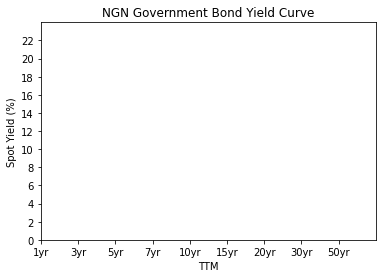

In [ ]:

maturities = ['1yr','3yr','5yr','7yr','10yr', '15yr', '20yr', '30yr', '50yr']
data = df_yieldcurves
data['inverted'] = data['10yr'] < data['1yr']
#df = df_yieldcurves[limited_maturities]
#df.head()

# Initialize figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
line, =ax.plot([], [])

# Set the range of ticks
ax.set_xlim(0,9)
ax.set_ylim(0,24)

# Set the tick locations
ax.set_xticks(range(9))
ax.set_yticks(range(0,24,2))

# Set the axis labels
ax.set_xticklabels(maturities)
ax.set_yticklabels(range(0,24,2))

#ax.yaxis.set_label_positions("left")
#ax.yaxis.tick_left()

plt.ylabel("Spot Yield (%)")
plt.xlabel("TTM")


def init_func():
  line.set_data([], [])
  plt.title("NGN Government Bond Yield Curve")
  return line

def animate(i):
  x=range(0, len(maturities))
  y=data[maturities].iloc[i]
  dt_ = data.index[i].strftime("%Y-%m-%d")

  if data.inverted.iloc[i]:
    line.set_colour("r")
  else:
    line.set_color("y")

  line.set_data(x,y)

  plt.title(f"NGN Government Bond Yield Curve ({dt_})")
  return line

ani = animation.FuncAnimation(
    fig,
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=5,
    blit=True
)


In [ ]:
'''# Initialize figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [])

# Set the range of ticks
ax.set_xlim(0, 7)
ax.set_ylim(0, 20)

# Set the tick locations
ax.set_xticks(range(8))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

# Set the axis labels
ax.set_xticklabels(["1m","3m","6m","1y","5y","10y","20y","30y"])
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

# Force the y-axis labels to the left
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

# Add the axis lables
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturty")
#Next, build the animation functions.

def init_func():
    line.set_data([], [])
    plt.title("U.S. Treasury Bond Yield Curve")
    return line

def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")

    if data.inverted.iloc[i]:
        line.set_color("r")
    else:
        line.set_color("y")

    line.set_data(x, y)

    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return line,

ani = animation.FuncAnimation(
    fig,
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=5,
    blit=True
)
'''

# PCA on Yield Curve

In [ ]:
maturities = ['1yr','3yr','5yr','7yr','10yr', '15yr', '20yr', '30yr', '50yr']
data = df_yieldcurves
data['inverted'] = data['10yr'] < data['1yr']
#df = df_yieldcurves[limited_maturities]
#df.head()


# Standardisation
X = df_yieldcurves[maturities]
#df = x.drop(axis=1,columns=[‘Date’])
#X = df.values
#Normalization of the data
print(X.head())
#X = scale(X) #Note that it it possible to scale and retain the data in a dataframe rather than in a numpy array
print(X)
X = pd.DataFrame(X, index = df_yieldcurves.index, columns = maturities)
X.head()


                 1yr       3yr       5yr       7yr      10yr      15yr  \
2015-01-05  0.163696  0.155098  0.156239  0.156804  0.155242  0.148978   
2015-01-06  0.162512  0.155325  0.156189  0.156930  0.154777  0.148615   
2015-01-07  0.163164  0.159226  0.158763  0.158240  0.153927  0.148197   
2015-01-08  0.160794  0.159305  0.159502  0.158762  0.157721  0.151284   
2015-01-09  0.156487  0.159119  0.158528  0.158607  0.158668  0.151963   

                20yr      30yr      50yr  
2015-01-05  0.159382  0.155969  0.153176  
2015-01-06  0.159022  0.155662  0.152912  
2015-01-07  0.158993  0.155812  0.153203  
2015-01-08  0.162296  0.158714  0.155783  
2015-01-09  0.162882  0.159171  0.156137  
                 1yr       3yr       5yr       7yr      10yr      15yr  \
2015-01-05  0.163696  0.155098  0.156239  0.156804  0.155242  0.148978   
2015-01-06  0.162512  0.155325  0.156189  0.156930  0.154777  0.148615   
2015-01-07  0.163164  0.159226  0.158763  0.158240  0.153927  0.148197   
2

,1yr,3yr,5yr,7yr,10yr,15yr,20yr,30yr,50yr
2015-01-05,0.163696,0.155098,0.156239,0.156804,0.155242,0.148978,0.159382,0.155969,0.153176
2015-01-06,0.162512,0.155325,0.156189,0.156930,0.154777,0.148615,0.159022,0.155662,0.152912
2015-01-07,0.163164,0.159226,0.158763,0.158240,0.153927,0.148197,0.158993,0.155812,0.153203
2015-01-08,0.160794,0.159305,0.159502,0.158762,0.157721,0.151284,0.162296,0.158714,0.155783
2015-01-09,0.156487,0.159119,0.158528,0.158607,0.158668,0.151963,0.162882,0.159171,0.156137


In [ ]:
df_yieldcurves_d1 = df_yieldcurves.diff(1).std()
print(df_yieldcurves_d1)

1yr         0.005969
2yr         0.003935
3yr         0.003192
4yr         0.002445
5yr         0.002892
              ...   
117yr       0.001561
118yr       0.001515
119yr       0.001475
120yr       0.001443
inverted    0.201514
Length: 121, dtype: float64


In [ ]:
# Computing factor loadings and contribution of variance

from functools import reduce

pca=PCA(n_components=9)
InputData = X.diff(1).bfill()
#InputDataSc = scale(InputData)
InputDataSc = (InputData - InputData.mean())/InputData.std()

pca.fit(InputDataSc)
factor_loading = pca.components_
df_factor_loading = pd.DataFrame(factor_loading)

Y = pd.DataFrame(pca.fit_transform(InputData))

Z = pd.DataFrame(pca.inverse_transform(Y))
print(df_factor_loading)
print(Y)
print(InputDataSc)
print(Z)
#test = df_factor_loading.apply(lambda i: i**2).sum(axis=0)


          0         1         2         3         4         5         6  \
0  0.118967  0.220142  0.245970  0.267505  0.249027  0.249358  0.450212   
1  0.134492  0.381448  0.370880  0.386370  0.340024  0.324076 -0.395787   
2  0.880923 -0.441295 -0.115625  0.060722  0.054657  0.087614 -0.027540   
3  0.004489  0.181818 -0.563154 -0.043299  0.742658 -0.308802 -0.020768   
4 -0.114667  0.000488 -0.395651 -0.343066  0.031239  0.843378 -0.010172   
5 -0.388106 -0.597674 -0.174251  0.657950  0.107872  0.129065 -0.021271   
6  0.166165  0.468841 -0.532138  0.469008 -0.498660 -0.017748  0.018663   
7 -0.018124 -0.034781 -0.036898 -0.055101 -0.081035 -0.038684 -0.635315   
8  0.000027  0.000147  0.000145 -0.000010  0.000358  0.001899 -0.484709   

          7         8  
0  0.478519  0.499459  
1 -0.338968 -0.239558  
2 -0.022991 -0.015044  
3 -0.002027  0.023870  
4 -0.012242 -0.010053  
5 -0.012169  0.001908  
6  0.009784 -0.004065  
7 -0.063435  0.760495  
8  0.806951 -0.337466  
         

<Axes: >

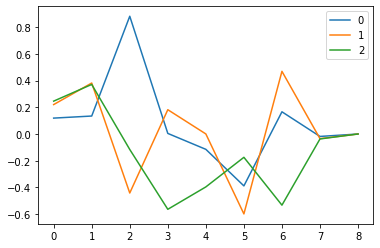

In [ ]:
df_factor_loading.iloc[:, 0:3].plot()

In [ ]:
InputDataSc

array([[-0.19145706,  0.07679572, -0.01235532, ..., -0.05756468,
        -0.06534955, -0.07472081],
       [-0.19145706,  0.07679572, -0.01235532, ..., -0.05756468,
        -0.06534955, -0.07472081],
       [ 0.11652369,  1.22855054,  0.89580967, ..., -0.00389795,
         0.03320134,  0.08457027],
       ...,
       [ 0.02468354, -0.52806527, -0.14965206, ..., -1.0782472 ,
        -0.96379203, -0.76809142],
       [ 0.02469333,  0.00417978, -0.13499163, ...,  0.02327594,
         0.02096697,  0.01717601],
       [ 0.00711318,  0.00565726,  0.00381814, ...,  0.62833759,
         0.5581313 ,  0.44563478]])

In [ ]:
X2 = pd.DataFrame(InputDataSc).copy(deep=True)
print(X2.head())
X2.index, X2.columns = [range(X2.index.size), range(X2.columns.size)]
print(X2)
Y2 = X2.dot(df_factor_loading)
print(Y2.head())
Y2.index, Y2.columns = [X.index, X.columns]
print(Y2)

          0         1         2         3         4         5         6  \
0 -0.191457  0.076796 -0.012355  0.047634 -0.151554 -0.111034 -0.057565   
1 -0.191457  0.076796 -0.012355  0.047634 -0.151554 -0.111034 -0.057565   
2  0.116524  1.228551  0.895810  0.451396 -0.279967 -0.127776 -0.003898   
3 -0.390204  0.030197  0.260695  0.182892  1.268562  0.916730  0.533753   
4 -0.714893 -0.052567 -0.332065 -0.048232  0.319092  0.199083  0.095300   

          7         8  
0 -0.065350 -0.074721  
1 -0.065350 -0.074721  
2  0.033201  0.084570  
3  0.626820  0.742364  
4  0.099415  0.102762  
             0         1         2         3         4         5         6  \
0    -0.191457  0.076796 -0.012355  0.047634 -0.151554 -0.111034 -0.057565   
1    -0.191457  0.076796 -0.012355  0.047634 -0.151554 -0.111034 -0.057565   
2     0.116524  1.228551  0.895810  0.451396 -0.279967 -0.127776 -0.003898   
3    -0.390204  0.030197  0.260695  0.182892  1.268562  0.916730  0.533753   
4    -0.714893 

              0
0  7.378313e-05
1  3.576424e-05
2  1.857796e-05
3  8.011476e-06
4  6.737167e-06
5  6.457561e-06
6  4.864533e-06
7  8.735411e-07
8  5.089047e-10 0    82.624128
dtype: float64
           0
0  47.580497
1  23.063268
2  11.980363
3   5.166357
4   4.344594
5   4.164284
6   3.136989
7   0.563320
8   0.000328 0    82.624128
dtype: float64


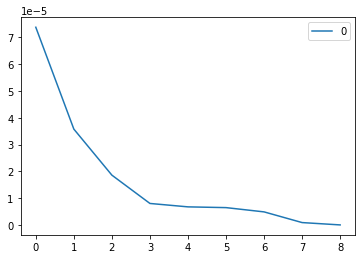

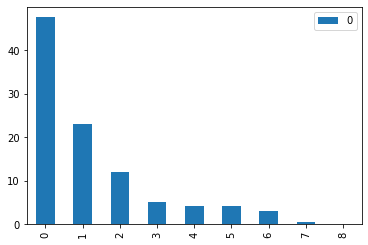

In [ ]:
# variance percent of each PC
variance_percent_df = pd.DataFrame(data=pca.explained_variance_)
variance_percent_df.plot()
variance_ratio_df = pd.DataFrame(data=pca.explained_variance_ratio_)
variance_ratio_df = variance_ratio_df * 100
variance_ratio_df.plot.bar()
print(variance_percent_df, variance_ratio_df[0:3].sum() )
print(variance_ratio_df, variance_ratio_df[0:3].sum() )

In [ ]:
df_factor_loading.std()

0    0.341262
1    0.352923
2    0.324000
3    0.312689
4    0.335510
5    0.320302
6    0.327672
7    0.339293
8    0.344364
dtype: float64

# Generating Bond Cashflows

In [ ]:
df_Bonds = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/28.02.1 FMDQ DQL _ Yield Interpolations JUN.22 - FEB.23.xlsx', sheet_name='Yields(TBills,Bonds) FEB23.28', parse_dates=True, skiprows=27, usecols='R:Z')
df_Bonds['Settlement_Date'] = '2023-02-28'

df_Bonds.head(20)



,Description,Issue Date,Coupon (%),Outstanding Value (₦’bn),Maturity Date,TTM (Yrs),Yield (%),Unnamed: 24,Closing Price,Settlement_Date
0,12.75 27-APR-2023,2018-04-27,12.7500,735.960000,2023-04-27,0.158904,2.326783,NaN,101.638664,2023-02-28
1,^14.20 14-MAR-2024,2014-03-14,14.2000,719.994128,2024-03-14,1.039672,7.517195,NaN,106.550000,2023-02-28
2,^13.53 23-MAR-2025,2018-03-23,13.5300,562.461000,2025-03-23,2.063869,10.272863,NaN,105.902300,2023-02-28
3,^12.50 22-JAN-2026,2016-01-22,12.5000,1199.738333,2026-01-22,2.899384,11.703363,NaN,101.882500,2023-02-28
4,^16.2884 17-MAR-2027,2017-03-17,16.2884,948.840000,2027-03-17,4.047097,13.043528,NaN,109.936900,2023-02-28
5,^13.98 23-FEB-2028,2018-02-23,13.9800,1357.859000,2028-02-23,4.984489,13.947554,NaN,100.107600,2023-02-28
6,15.00 28-NOV-2028,2008-11-28,15.0000,75.000001,2028-11-28,5.748175,14.046149,NaN,103.614230,2023-02-28
7,^14.55 26-APR-2029,2019-04-26,14.5500,741.089000,2029-04-26,6.156824,14.099650,NaN,101.760000,2023-02-28
8,12.49 22-MAY-2029,2009-05-22,12.4900,150.000000,2029-05-22,6.228002,14.105066,NaN,93.395554,2023-02-28
9,8.50 20-NOV-2029,2009-11-20,8.5000,200.000000,2029-11-20,6.726242,14.159298,NaN,75.926001,2023-02-28


In [ ]:
# Generate a new dataframe here going out 30 years where rows are monthly buckets. Each bond above will be a column in the dataframe

df_C = pd.DataFrame(index = pd.date_range(start='2023-04-30', end='2053-03-31', freq='M'),data=0, columns=df_Bonds['Maturity Date'])

In [ ]:
# Generating CF matrix for 100 nominal of each bond ...

df_C[:] = 0
for c in range(len(df_Bonds)):
  coupon = df_Bonds['Coupon (%)'][c]
  column = df_Bonds['Maturity Date'][c]

  for index, row in df_C[column].items():
    if ((index.month == df_C[column].name.month or index.month == (df_C[column].name.month + 6) % 12) and  index < df_C[column].name):
      df_C[column][index] = coupon/2
    if (index.month == df_C[column].name.month and index.year == df_C[column].name.year):
      df_C[column][index] = 100 +  coupon/2


<ipython-input-5-a521eb96759c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C[column][index] = coupon/2
<ipython-input-5-a521eb96759c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C[column][index] = 100 +  coupon/2


In [ ]:
df_C

Maturity Date,2023-04-27,2024-03-14,2025-03-23,2026-01-22,2027-03-17,2028-02-23,2028-11-28,2029-04-26,2029-05-22,2029-11-20,2030-07-23,2032-04-27,2034-07-18,2035-03-27,2036-03-18,2037-04-18,2042-01-21,2045-07-24,2049-04-26,2050-03-27
2023-04-30,106.375,0.0,0.0,0.00,0.0,0.00,0.0,7.275,0.000,0.00,0,6.25,0.00000,0.0,0.0,8.12495,0.0,0.0,7.4,0.0
2023-05-31,0.000,0.0,0.0,0.00,0.0,0.00,7.5,0.000,6.245,4.25,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2023-06-30,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2023-07-31,0.000,0.0,0.0,6.25,0.0,0.00,0.0,0.000,0.000,0.00,5,0.00,6.07465,0.0,0.0,0.00000,6.5,4.9,0.0,0.0
2023-08-31,0.000,0.0,0.0,0.00,0.0,6.99,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052-11-30,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2052-12-31,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2053-01-31,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2053-02-28,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0,0.00,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [ ]:
for index, row in df_Bonds.iterrows():
  coupon = row['Coupon (%)']
  print(coupon)

12.75
14.2
13.530000000000001
12.5
16.2884
13.98
15.0
14.549999999999999
12.49
8.5
10.0
12.5
12.1493
12.5
12.4
16.2499
13.0
9.8
14.799999999999999
12.98
